In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Select relevant numerical features
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
features_2d = pca.fit_transform(scaled_features)

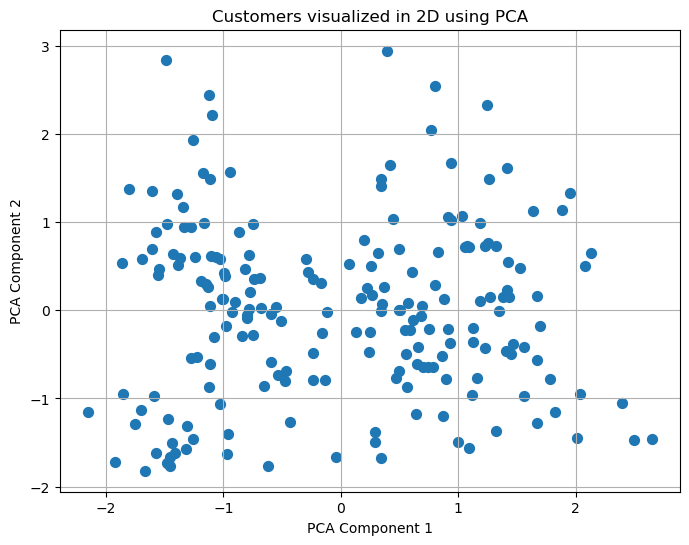

In [9]:
# Visualize in 2D
plt.figure(figsize=(8, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], s=50)
plt.title('Customers visualized in 2D using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


In [11]:
# Set number of clusters (e.g., K=5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

In [12]:
# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

In [14]:
# Show sample of data with cluster labels
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,2


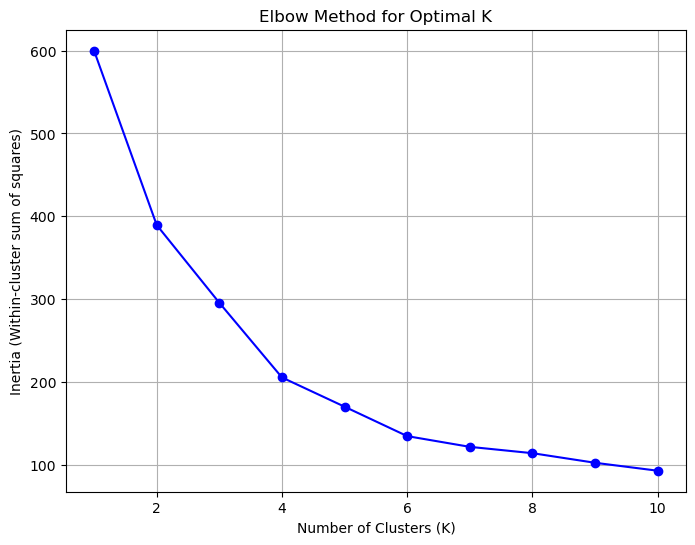

In [15]:
inertia = []  # List to store the sum of squared distances (inertia)
k_range = range(1, 11)  # Try K from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True)
plt.show()


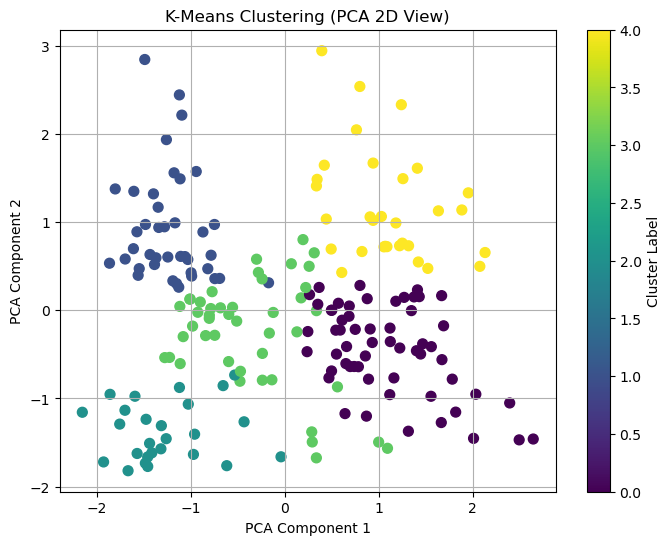

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(
    features_2d[:, 0], features_2d[:, 1],
    c=cluster_labels, cmap='viridis', s=50
)
plt.title('K-Means Clustering (PCA 2D View)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [18]:
# Compute Silhouette Score
score = silhouette_score(scaled_features, cluster_labels)

In [20]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=2: 0.3355
Silhouette Score for k=3: 0.3579
Silhouette Score for k=4: 0.4040
Silhouette Score for k=5: 0.4085
Silhouette Score for k=6: 0.4311
Silhouette Score for k=7: 0.4101
Silhouette Score for k=8: 0.3674
Silhouette Score for k=9: 0.3744
Silhouette Score for k=10: 0.3619
